In [12]:
from QuantLib import *
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
maturity_date = Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20
dividend_rate = 0.0163
option_type = Option.Call

risk_free_rate = 0.001
day_count = Actual365Fixed()
calendar = UnitedStates()

calculation_date = Date(8, 5, 2015)
Settings.instance().evaluationDate = calculation_date


In [5]:
payoff = PlainVanillaPayoff(option_type, strike_price)
exercise = EuropeanExercise(maturity_date)
european_option = VanillaOption(payoff, exercise)

spot_handle = QuoteHandle(SimpleQuote(spot_price))
flat_ts = YieldTermStructureHandle(FlatForward(calculation_date, risk_free_rate, day_count))
dividend_yield = YieldTermStructureHandle(FlatForward(calculation_date, dividend_rate, day_count))
flat_vol_ts = BlackVolTermStructureHandle(BlackConstantVol(calculation_date, calendar, volatility, day_count))
bsm_process = BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, flat_vol_ts)

In [6]:
european_option.setPricingEngine(AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("Analytical price of the option is %lf"%bs_price)

Analytical price of the option is 6.749272


In [9]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = BinomialVanillaEngine(bsm_process, 'crr', steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

steps = range(2, 200, 1)
prices = [binomial_price(european_option, bsm_process, step) for step in steps]

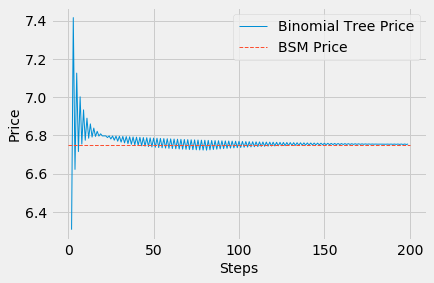

In [14]:
plt.plot(steps, prices, lw=1, label='Binomial Tree Price')
plt.plot([0, 200], [bs_price, bs_price], '--', lw=1, label='BSM Price')

plt.xlabel('Steps', size=14)
plt.ylabel('Price', size=14)
plt.legend()

In [15]:
payoff = PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date
am_exercise = AmericanExercise(settlement, maturity_date)
american_option = VanillaOption(payoff, am_exercise)

steps = range(2, 200, 1)
prices = [binomial_price(american_option, bsm_process, step) for step in steps]

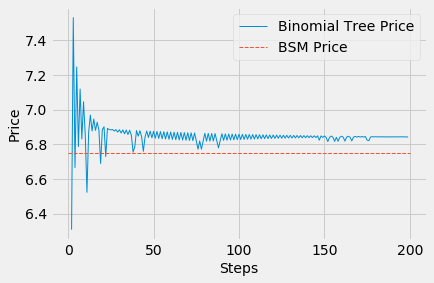

In [16]:
plt.plot(steps, prices, lw=1, label='Binomial Tree Price')
plt.plot([0, 200], [bs_price, bs_price], '--', lw=1, label='BSM Price')

plt.xlabel('Steps', size=14)
plt.ylabel('Price', size=14)
plt.legend()